In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Step 1: Memuat Dataset
file_path = '/content/BooksDatasetClean.csv'  # Ganti dengan path dataset Anda
data = pd.read_csv(file_path)

# Step 2: Pra-pemrosesan Data
# Mengonversi kolom string menjadi numerik menggunakan LabelEncoder
string_columns = ['Title', 'Authors', 'Description', 'Category', 'Publisher',
                  'Price Starting With ($)', 'Publish Date (Month)']  # Sesuaikan dengan dataset Anda
target_column = 'Publish Date (Year)'  # Sesuaikan dengan kolom target Anda

# Mengisi nilai yang hilang
imputer = SimpleImputer(strategy='most_frequent')
data[string_columns + [target_column]] = imputer.fit_transform(data[string_columns + [target_column]])

# Mengonversi kolom string menjadi angka
label_encoders = {}
for col in string_columns + [target_column]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Memisahkan fitur dan target
X = data.drop(columns=[target_column])
y = data[target_column]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Membuat Model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Step 4: Random Search untuk Hyperparameter Tuning
param_dist = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=dt,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Jumlah iterasi pencarian
                                   cv=3,  # Cross-validation folds
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Melatih model dengan Random Search
random_search.fit(X_train, y_train)

# Step 5: Evaluasi Model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", random_search.best_params_)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'gini'}
Accuracy: 0.06107796051035754

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Step 1: Memuat Dataset
file_path = '/content/BooksDatasetClean.csv'  # Ganti dengan path dataset Anda
data = pd.read_csv(file_path)

# Step 2: Pra-pemrosesan Data
# Mengonversi kolom string menjadi numerik menggunakan LabelEncoder
string_columns = ['Title', 'Authors', 'Description', 'Category', 'Publisher',
                  'Price Starting With ($)', 'Publish Date (Month)']  # Sesuaikan dengan dataset Anda
target_column = 'Publish Date (Year)'  # Sesuaikan dengan kolom target Anda

# Mengisi nilai yang hilang
imputer = SimpleImputer(strategy='most_frequent')
data[string_columns + [target_column]] = imputer.fit_transform(data[string_columns + [target_column]])

# Mengonversi kolom string menjadi angka
label_encoders = {}
for col in string_columns + [target_column]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Memisahkan fitur dan target
X = data.drop(columns=[target_column])
y = data[target_column]

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Baseline
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

print("Baseline Model Accuracy:", baseline_accuracy)

# Step 4: Random Search untuk Hyperparameter Tuning
dt = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=dt,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Jumlah iterasi pencarian
                                   cv=3,  # Cross-validation folds
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Melatih model dengan Random Search
random_search.fit(X_train, y_train)

# Step 5: Evaluasi Model Setelah Optimasi
best_model = random_search.best_estimator_
optimized_predictions = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, optimized_predictions)

print("Optimized Model Accuracy:", optimized_accuracy)
print("\nBest Hyperparameters:", random_search.best_params_)

# Step 6: Perbandingan Akurasi
print("\n=== Perbandingan Akurasi ===")
print(f"Baseline Model Accuracy: {baseline_accuracy}")
print(f"Optimized Model Accuracy: {optimized_accuracy}")

# Laporan klasifikasi untuk kedua model
print("\n=== Laporan Klasifikasi Baseline Model ===")
print(classification_report(y_test, baseline_predictions))

print("\n=== Laporan Klasifikasi Optimized Model ===")
print(classification_report(y_test, optimized_predictions))


Baseline Model Accuracy: 0.05967108135642556
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Optimized Model Accuracy: 0.06107796051035754

Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'gini'}

=== Perbandingan Akurasi ===
Baseline Model Accuracy: 0.05967108135642556
Optimized Model Accuracy: 0.06107796051035754

=== Laporan Klasifikasi Baseline Model ===
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          25       0.00      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Step 1: Memuat Dataset
file_path = 'BooksDatasetClean.csv'  # Ganti dengan path dataset Anda
data = pd.read_csv(file_path)

# Step 2: Pra-pemrosesan Data
# Mengonversi kolom string menjadi numerik menggunakan LabelEncoder
string_columns = ['Title', 'Authors', 'Description', 'Category', 'Publisher',
                  'Price Starting With ($)', 'Publish Date (Month)']  # Sesuaikan dengan dataset Anda
target_column = 'Publish Date (Year)'  # Sesuaikan dengan kolom target Anda

# Mengisi nilai yang hilang
imputer = SimpleImputer(strategy='most_frequent')
data[string_columns + [target_column]] = imputer.fit_transform(data[string_columns + [target_column]])

# Mengonversi kolom string menjadi angka
label_encoders = {}
for col in string_columns + [target_column]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Memisahkan fitur dan target
X = data.drop(columns=[target_column])
y = data[target_column]

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Baseline
baseline_model = DecisionTreeClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

print("Baseline Model Accuracy:", baseline_accuracy)

# Step 4: Random Search untuk Hyperparameter Tuning
dt = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(estimator=dt,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Jumlah iterasi pencarian
                                   cv=3,  # Cross-validation folds
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Melatih model dengan Random Search
random_search.fit(X_train, y_train)

# Step 5: Evaluasi Model Setelah Optimasi
best_model = random_search.best_estimator_
optimized_predictions = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, optimized_predictions)

# Menghitung persentase peningkatan akurasi
accuracy_improvement = ((optimized_accuracy - baseline_accuracy) / baseline_accuracy) * 100

print("\n=== Hasil Evaluasi ===")
print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")
print(f"Optimized Model Accuracy: {optimized_accuracy:.4f}")
print(f"Peningkatan Akurasi: {accuracy_improvement:.2f}%")

print("\nBest Hyperparameters:", random_search.best_params_)

# Step 6: Laporan Klasifikasi
print("\n=== Laporan Klasifikasi Baseline Model ===")
print(classification_report(y_test, baseline_predictions))

print("\n=== Laporan Klasifikasi Optimized Model ===")
print(classification_report(y_test, optimized_predictions))


Baseline Model Accuracy: 0.05967108135642556
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(



=== Hasil Evaluasi ===
Baseline Model Accuracy: 0.0597
Optimized Model Accuracy: 0.0611
Peningkatan Akurasi: 2.36%

Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'gini'}

=== Laporan Klasifikasi Baseline Model ===
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          28       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


=== Confusion Matrix Baseline Model ===


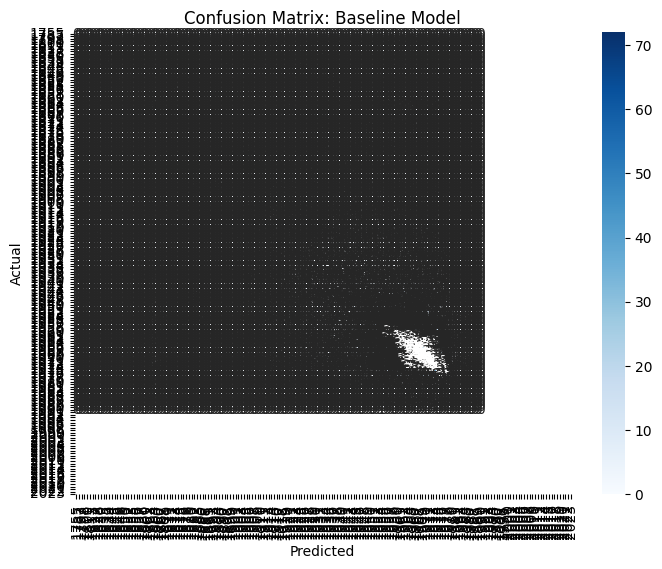


=== Confusion Matrix Optimized Model ===


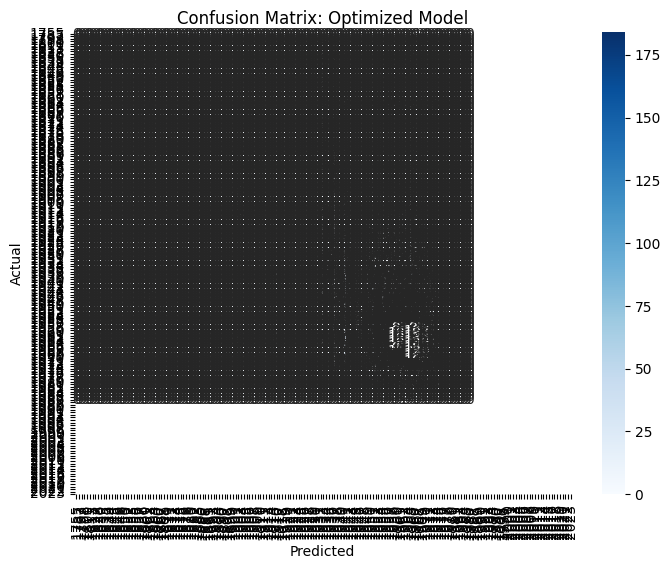

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menampilkan Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders[target_column].classes_, yticklabels=label_encoders[target_column].classes_)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion Matrix untuk Baseline Model
print("\n=== Confusion Matrix Baseline Model ===")
plot_confusion_matrix(y_test, baseline_predictions, "Confusion Matrix: Baseline Model")

# Confusion Matrix untuk Optimized Model
print("\n=== Confusion Matrix Optimized Model ===")
plot_confusion_matrix(y_test, optimized_predictions, "Confusion Matrix: Optimized Model")


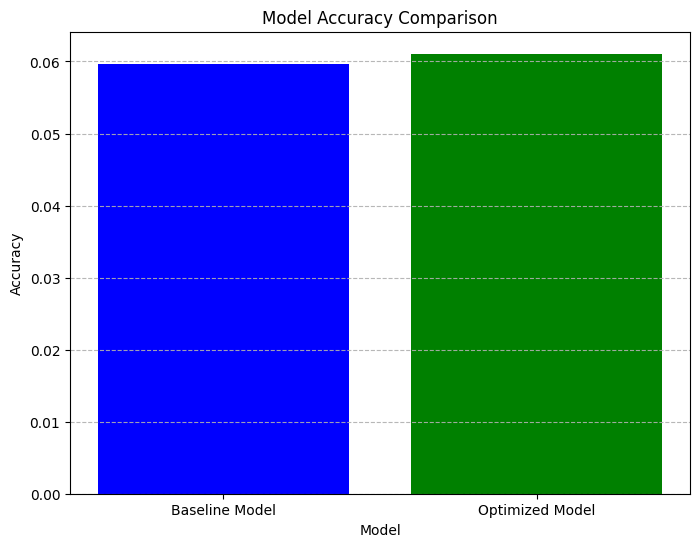

In [ ]:
import matplotlib.pyplot as plt

# Misalnya, jika Anda ingin memplot akurasi model baseline dan model optimasi
# dan menambahkan grid line di grafiknya.

# Data untuk plot
models = ['Baseline Model', 'Optimized Model']
accuracies = [baseline_accuracy, optimized_accuracy]

# Membuat plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])

# Menambahkan grid line
plt.grid(True, axis='y', linestyle='--', alpha=0.9)

# Menambahkan label dan judul
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Menampilkan plot
plt.show()
